# importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier

# import and read the data

In [2]:
data=pd.read_csv("loan_data.csv")

# explore the data

In [3]:
data.info()
data.duplicated().sum()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

0

In [4]:
data.isnull().sum() 

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [5]:
print(data.describe())


         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000  

In [6]:
data.describe(include="object") 

person_gender person_education person_home_ownership loan_intent  \
count          45000            45000                 45000       45000   
unique             2                5                     4           6   
top             male         Bachelor                  RENT   EDUCATION   
freq           24841            13399                 23443        9153   

       previous_loan_defaults_on_file  
count                           45000  
unique                              2  
top                               Yes  
freq                            22858

# visualization of data to gain insights

In [7]:
data['loan_status'].value_counts()


loan_status
0    35000
1    10000
Name: count, dtype: int64

In [8]:
fig = px.pie(data, names='loan_status')
fig.show()

In [9]:
data['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [10]:
fig = px.pie(data, names='person_gender')
fig.show()

In [11]:
data['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [12]:
fig = px.pie(data, names='person_education')
fig.show()

In [13]:
data['person_home_ownership'].value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [14]:
fig = px.pie(data, names='person_home_ownership')
fig.show()

In [15]:
data['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [16]:
fig = px.pie(data, names='loan_intent')
fig.show()

In [17]:
data['previous_loan_defaults_on_file'].value_counts()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

In [18]:
fig = px.pie(data, names='previous_loan_defaults_on_file')
fig.show()

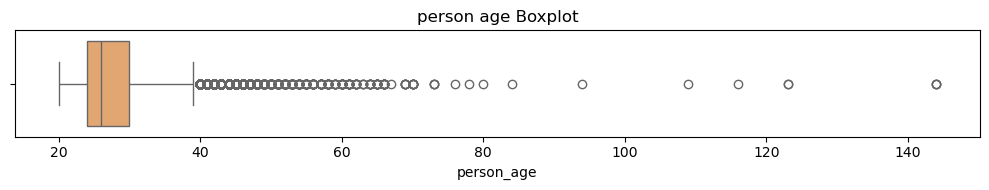


Summary Statistics for person age:
 count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64


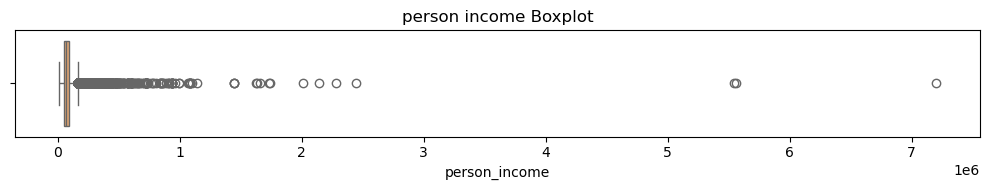


Summary Statistics for person income:
 count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64


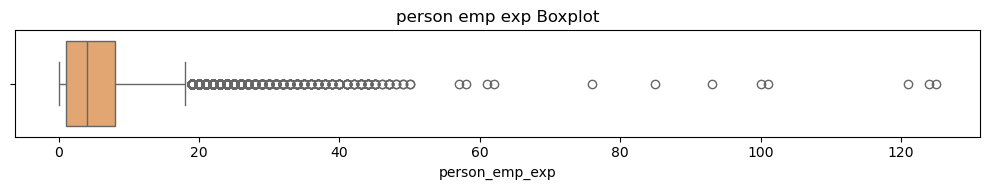


Summary Statistics for person emp exp:
 count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64


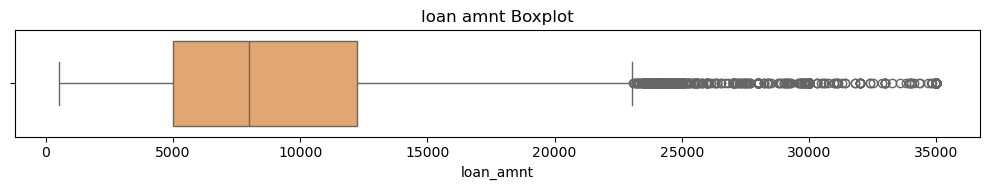


Summary Statistics for loan amnt:
 count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64


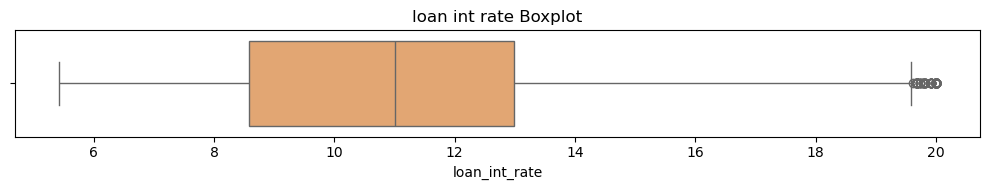


Summary Statistics for loan int rate:
 count    45000.000000
mean        11.006606
std          2.978808
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64


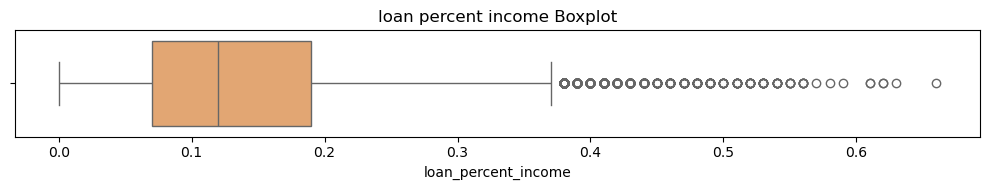


Summary Statistics for loan percent income:
 count    45000.000000
mean         0.139725
std          0.087212
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64


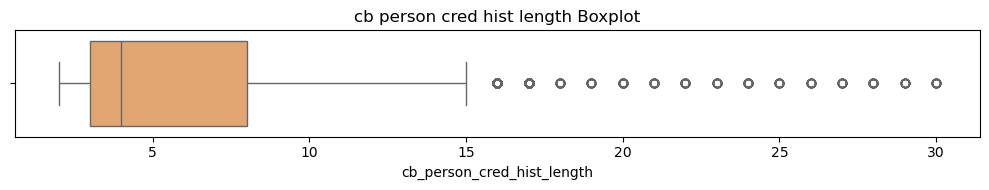


Summary Statistics for cb person cred hist length:
 count    45000.000000
mean         5.867489
std          3.879702
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


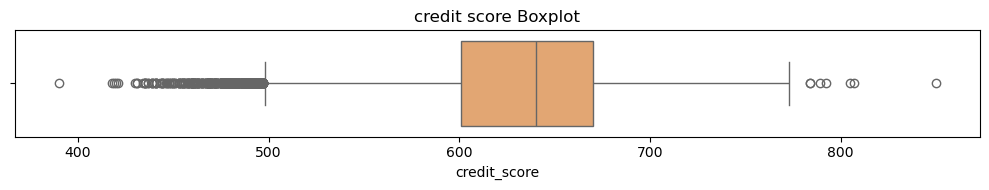


Summary Statistics for credit score:
 count    45000.000000
mean       632.608756
std         50.435865
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        850.000000
Name: credit_score, dtype: float64


In [19]:
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    sns.boxplot(x=data[column], color='sandybrown')
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for column in columns_to_analyze:
    univariate_analysis(data, column, column.replace('_', ' '))

In [20]:
numerical_columns = ['person_age','person_income','person_emp_exp','loan_amnt',
                     'loan_int_rate','loan_percent_income','cb_person_cred_hist_length'
                     ,'credit_score']

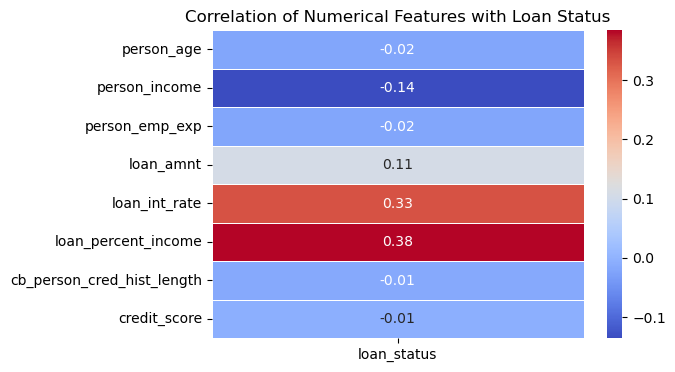

In [21]:
correlation_with_loan_status = data[numerical_columns + ['loan_status']].corr()['loan_status'].drop('loan_status')
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_with_loan_status.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Numerical Features with Loan Status')
plt.show()


In [22]:
 print(data['person_gender'].dtype)
 print(data['person_gender'].unique())
 data['person_gender'] = data['person_gender'].astype(str)
 data['loan_status'] = data['loan_status'].astype(str)

object
['female' 'male']


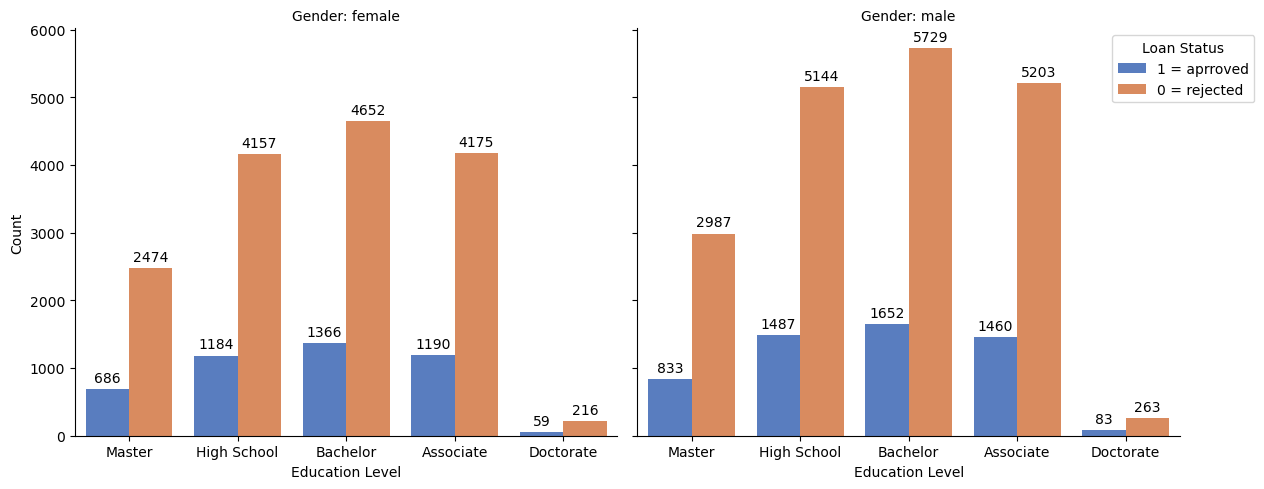

In [23]:
data['person_gender'] = data['person_gender'].astype(str)
data['loan_status'] = data['loan_status'].astype(str)
g = sns.catplot(
    data=data,
    x='person_education', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

g.set_axis_labels("Education Level", "Count")
g.set_titles("Gender: {col_name}")

for ax in g.axes.flat:
    for p in ax.patches:
        # Make sure to cast height to string for annotation
        height = int(p.get_height())
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')


plt.legend(
    title="Loan Status",
    loc='upper right', 
 labels=['1 = aprroved', '0 = rejected'],
    bbox_to_anchor=(1.15, 1)
)

plt.show()


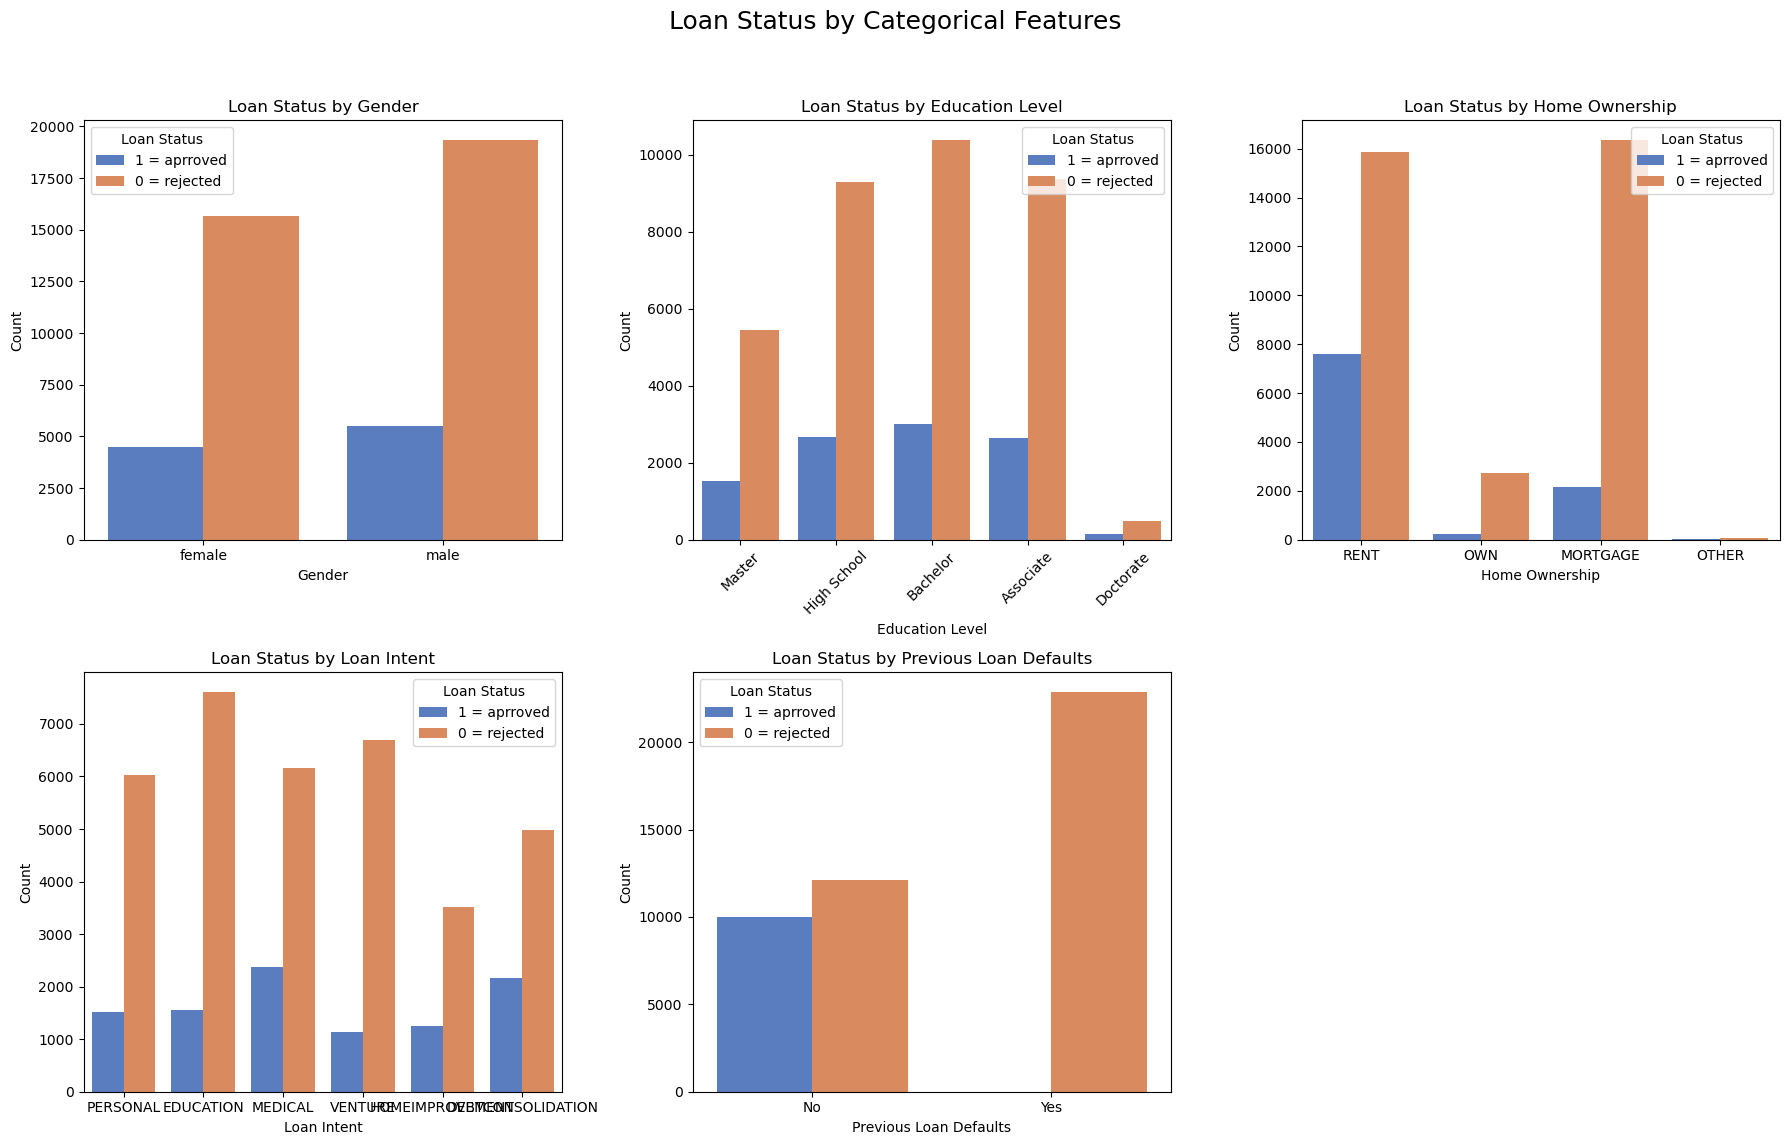

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Loan Status by Categorical Features", fontsize=18)

sns.countplot(data=data, x='person_gender', hue='loan_status', ax=axes[0, 0], palette='muted')
axes[0, 0].set_title("Loan Status by Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(title='Loan Status',labels=['1 = aprroved', '0 = rejected'])

sns.countplot(data=data, x='person_education', hue='loan_status', ax=axes[0, 1], palette='muted')
axes[0, 1].set_title("Loan Status by Education Level")
axes[0, 1].set_xlabel("Education Level")
axes[0, 1].set_ylabel("Count")
axes[0, 1].legend(title='Loan Status', labels=['1 = aprroved', '0 = rejected'])
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x='person_home_ownership', hue='loan_status', ax=axes[0, 2], palette='muted')
axes[0, 2].set_title("Loan Status by Home Ownership")
axes[0, 2].set_xlabel("Home Ownership")
axes[0, 2].set_ylabel("Count")
axes[0, 2].legend(title='Loan Status',labels=['1 = aprroved', '0 = rejected'])

sns.countplot(data=data, x='loan_intent', hue='loan_status', ax=axes[1, 0], palette='muted')
axes[1, 0].set_title("Loan Status by Loan Intent")
axes[1, 0].set_xlabel("Loan Intent")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(title='Loan Status',labels=['1 = aprroved', '0 = rejected'])

sns.countplot(data=data, x='previous_loan_defaults_on_file', hue='loan_status', ax=axes[1, 1], palette='muted')
axes[1, 1].set_title("Loan Status by Previous Loan Defaults")
axes[1, 1].set_xlabel("Previous Loan Defaults")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title='Loan Status', labels=['1 = aprroved', '0 = rejected'])

fig.delaxes(axes[1][2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_9724\1312863391.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_9724\1312863391.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



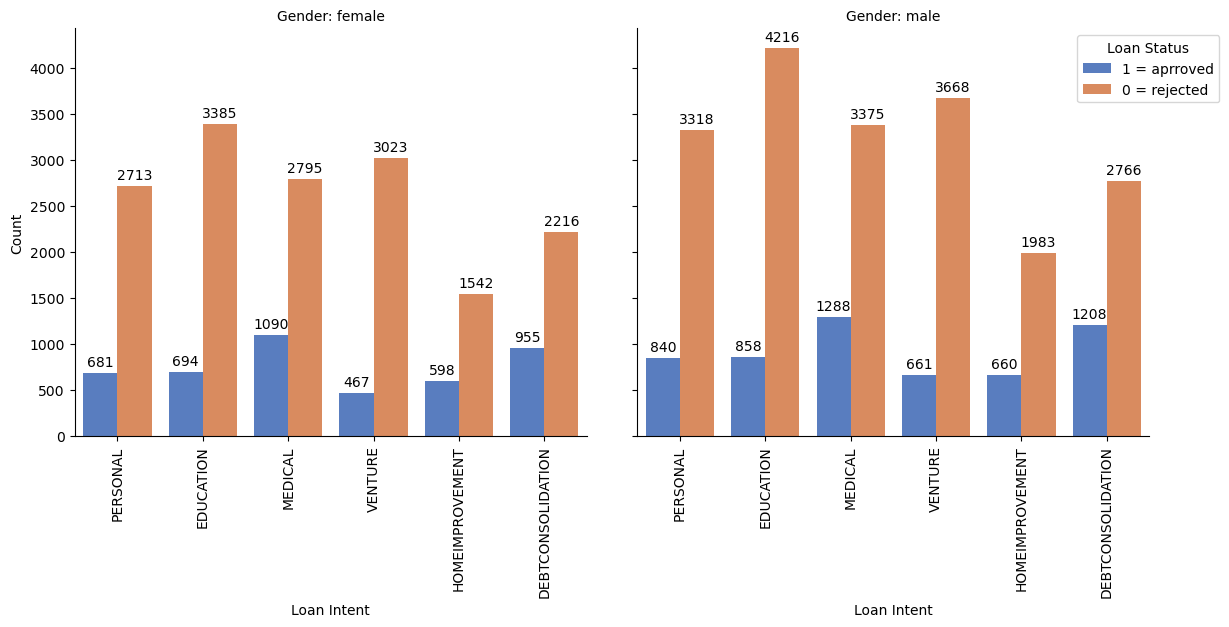

In [25]:
g = sns.catplot(
    data=data,
    x='loan_intent', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

g.set_axis_labels("Loan Intent", "Count")
g.set_titles("Gender: {col_name}")

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['1 = aprroved', '0 = rejected'],
    bbox_to_anchor=(1.15, 1)
)

plt.show()

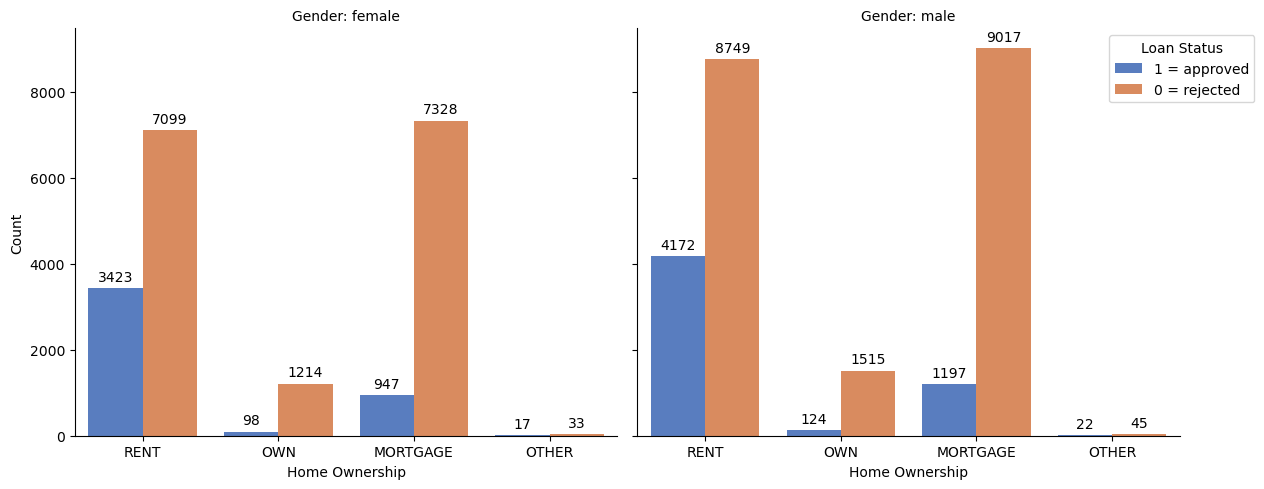

In [26]:
g = sns.catplot(
    data=data,
    x='person_home_ownership', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

g.set_axis_labels("Home Ownership", "Count")
g.set_titles("Gender: {col_name}")

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')


plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['1 = approved', '0 = rejected'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

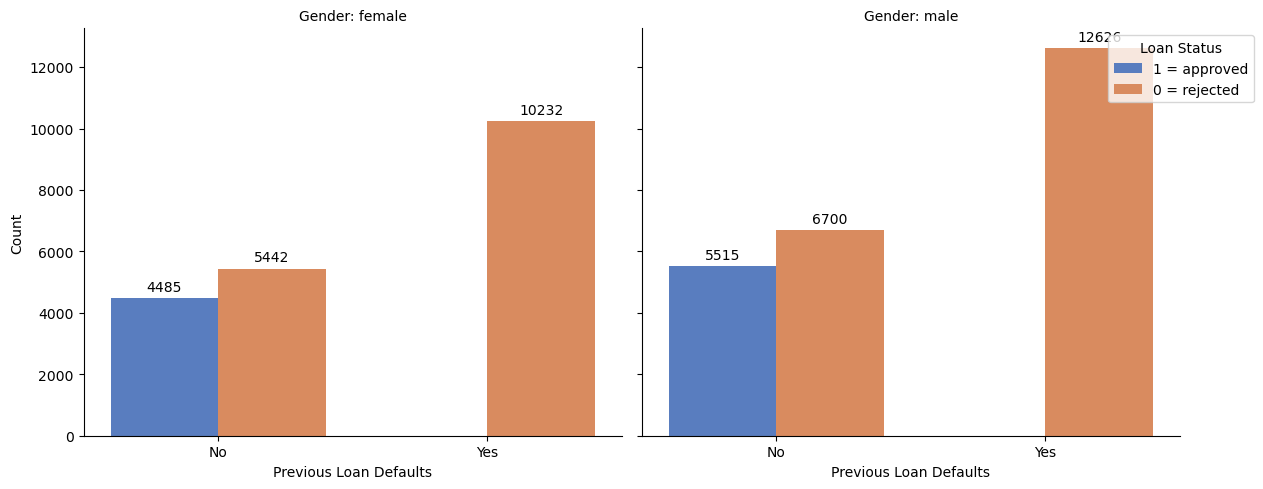

In [27]:
g = sns.catplot(
    data=data,
    x='previous_loan_defaults_on_file', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

g.set_axis_labels("Previous Loan Defaults", "Count")
g.set_titles("Gender: {col_name}")

for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['1 = approved', '0 = rejected'],
    bbox_to_anchor=(1.15, 1)
 
)
# Show the plot
plt.show()

# replace the outliers with median

In [28]:
median_age = data['person_age'].median()
data['person_age'] = data['person_age'].apply(lambda x: median_age if x > 80 else x)
median_exp = data['person_emp_exp'].median()
data['person_emp_exp'] = data['person_emp_exp'].apply(lambda x: median_exp if x > 40 else x)


# encode the data

In [29]:
label_encoder = LabelEncoder()
education_order = {'High School': 1, 'Associate': 2, 'Bachelor': 3, 
                   'Master': 4, 'Doctorate': 5}
data['person_education'] = data['person_education'].map(education_order)
data['previous_loan_defaults_on_file'] = label_encoder.fit_transform(data['previous_loan_defaults_on_file'])
data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent','person_gender'], drop_first=False)


# scale the data

In [30]:
scaler = StandardScaler()
data[['person_income','loan_amnt','loan_int_rate','credit_score','person_age','person_emp_exp','loan_percent_income','cb_person_cred_hist_length']] = scaler.fit_transform(
    data[['person_income', 'loan_amnt','loan_int_rate','credit_score','person_age','person_emp_exp','loan_percent_income','cb_person_cred_hist_length']])

In [31]:
data

person_age  person_education  person_income  person_emp_exp  loan_amnt  \
0       -0.974608                 4      -0.104090       -0.930119   4.024953   
1       -1.144242                 1      -0.846005       -0.930119  -1.359209   
2       -0.465706                 1      -0.844065       -0.407613  -0.646600   
3       -0.804974                 3      -0.007039       -0.930119   4.024953   
4       -0.635340                 4      -0.176371       -0.755950   4.024953   
...           ...               ...            ...             ...        ...   
44995   -0.126438                 2      -0.402231        0.114893   0.857799   
44996    1.569903                 2      -0.180537        2.030750  -0.092348   
44997    0.891367                 2      -0.290681        0.289062  -1.078758   
44998    0.212830                 3      -0.586348       -0.233444   0.382726   
44999   -0.635340                 1      -0.356994       -0.755950  -0.462113   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0           1.683039             4.016394                   -0.739109   
1           0.044782            -0.684829                   -0.996863   
2           0.625557             3.443074                   -0.739109   
3           1.417829             3.443074                   -0.996863   
4           1.095549             4.475050                   -0.481354   
...              ...                  ...                         ...   
44995       1.562184             1.952442                   -0.739109   
44996       1.028407             0.003155                    1.322928   
44997      -0.331212            -1.028821                    1.065174   
44998       0.746412             2.525762                    0.034155   
44999       2.028819            -0.111509                   -0.739109   

       credit_score  previous_loan_defaults_on_file  ...  \
0         -1.419814                               0  ...   
1         -2.549975                               1  ...   
2          0.047412                               0  ...   
3          0.840507                               0  ...   
4         -0.924130                               0  ...   
...             ...                             ...  ...   
44995      0.245686                               0  ...   
44996     -0.230171                               0  ...   
44997      0.701716                               0  ...   
44998     -0.567237                               0  ...   
44999     -0.091380                               0  ...   

      person_home_ownership_OWN  person_home_ownership_RENT  \
0                         False                        True   
1                          True                       False   
2                         False                       False   
3                         False                        True   
4                         False                        True   
...                         ...                         ...   
44995                     False                        True   
44996                     False                        True   
44997                     False                        True   
44998                     False                        True   
44999                     False                        True   

       loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                              False                  False   
1                              False                   True   
2                              False                  False   
3                              False                  False   
4                              False                  False   
...                              ...                    ...   
44995                          False                  False   
44996                          False                  False   
44997                           True                  False   
44998                          False             

# SVM Algorithm

In [32]:
SVM_data = data.sample(frac=0.3)

In [33]:
SVM_data

person_age  person_education  person_income  person_emp_exp  loan_amnt  \
12027   -0.635340                 2       0.182301       -0.233444  -0.567421   
32470    4.792950                 2      -0.100782        4.469112   0.066010   
35419   -0.296072                 1      -0.390207       -0.059275  -0.250705   
34681   -0.804974                 2       0.278954       -0.407613   0.066010   
39745    1.230635                 2       0.528750        0.985737  -0.822852   
...           ...               ...            ...             ...        ...   
28660    0.552098                 4       0.448399        0.637400   0.066010   
35142   -0.635340                 2      -0.136171       -0.755950  -0.754441   
22880    0.891367                 3      -0.610993        0.811568  -0.250705   
17486   -0.974608                 2      -0.691370       -0.930119  -0.725778   
5095    -0.804974                 3      -0.328283       -0.930119  -0.725778   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
12027      -1.180554            -0.914157                   -0.481354   
32470       0.873981             0.003155                    3.642720   
35419      -0.032431             0.232483                   -0.223599   
34681      -1.543119            -0.455501                   -0.739109   
39745      -0.676992            -1.143485                    0.291910   
...              ...                  ...                         ...   
28660      -0.341283            -0.570165                   -0.223599   
35142      -0.163358            -0.799493                   -0.481354   
22880       0.001139             1.379122                    0.549665   
17486       0.286492             0.691138                   -0.996863   
5095        1.934820            -0.570165                   -0.996863   

       credit_score  previous_loan_defaults_on_file  ...  \
12027      0.265513                               1  ...   
32470      0.959472                               1  ...   
35419     -0.864647                               1  ...   
34681     -0.924130                               1  ...   
39745     -1.043094                               1  ...   
...             ...                             ...  ...   
28660     -0.269826                               1  ...   
35142      0.146549                               0  ...   
22880      0.642234                               0  ...   
17486      0.503442                               0  ...   
5095      -1.261195                               0  ...   

      person_home_ownership_OWN  person_home_ownership_RENT  \
12027                     False                       False   
32470                     False                        True   
35419                     False                        True   
34681                     False                       False   
39745                     False                       False   
...                         ...                         ...   
28660                      True                       False   
35142                     False                        True   
22880                     False                        True   
17486                     False                        True   
5095                      False                        True   

       loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
12027                          False                  False   
32470                           True                  False   
35419                           True                  False   
34681                           True                  False   
39745                          False                   True   
...                              ...                    ...   
28660                          False                  False   
35142                          False                  False   
22880                          False                   True   
17486                          False             

In [34]:
SVM_data.head()

person_age  person_education  person_income  person_emp_exp  loan_amnt  \
12027   -0.635340                 2       0.182301       -0.233444  -0.567421   
32470    4.792950                 2      -0.100782        4.469112   0.066010   
35419   -0.296072                 1      -0.390207       -0.059275  -0.250705   
34681   -0.804974                 2       0.278954       -0.407613   0.066010   
39745    1.230635                 2       0.528750        0.985737  -0.822852   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
12027      -1.180554            -0.914157                   -0.481354   
32470       0.873981             0.003155                    3.642720   
35419      -0.032431             0.232483                   -0.223599   
34681      -1.543119            -0.455501                   -0.739109   
39745      -0.676992            -1.143485                    0.291910   

       credit_score  previous_loan_defaults_on_file  ...  \
12027      0.265513                               1  ...   
32470      0.959472                               1  ...   
35419     -0.864647                               1  ...   
34681     -0.924130                               1  ...   
39745     -1.043094                               1  ...   

      person_home_ownership_OWN  person_home_ownership_RENT  \
12027                     False                       False   
32470                     False                        True   
35419                     False                        True   
34681                     False                       False   
39745                     False                       False   

       loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
12027                          False                  False   
32470                           True                  False   
35419                           True                  False   
34681                           True                  False   
39745                          False                   True   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
12027                        False                False                 False   
32470                        False                False                 False   
35419                        False                False                 False   
34681                        False                False                 False   
39745                        False                False                 False   

       loan_intent_VENTURE  person_gender_female  person_gender_male  
12027                 True                  True               False  
32470                False                 False                True  
35419                False                 False                True  
34681                False                  True               False  
39745                False                 False                True  

[5 rows x 23 columns]

In [35]:
SVM_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13500 entries, 12027 to 5095
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      13500 non-null  float64
 1   person_education                13500 non-null  int64  
 2   person_income                   13500 non-null  float64
 3   person_emp_exp                  13500 non-null  float64
 4   loan_amnt                       13500 non-null  float64
 5   loan_int_rate                   13500 non-null  float64
 6   loan_percent_income             13500 non-null  float64
 7   cb_person_cred_hist_length      13500 non-null  float64
 8   credit_score                    13500 non-null  float64
 9   previous_loan_defaults_on_file  13500 non-null  int32  
 10  loan_status                     13500 non-null  object 
 11  person_home_ownership_MORTGAGE  13500 non-null  bool   
 12  person_home_ownership_OTHER     13

In [36]:
X = SVM_data.drop("loan_status", axis=1)  
y = SVM_data["loan_status"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Train the SVM Model with Different Kernels

In [38]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
results = []
for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((kernel, accuracy))
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)


Kernel: linear
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2124
           1       0.78      0.76      0.77       576

    accuracy                           0.90      2700
   macro avg       0.85      0.85      0.85      2700
weighted avg       0.90      0.90      0.90      2700

[[1998  126]
 [ 141  435]]
--------------------------------------------------
Kernel: poly
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2124
           1       0.82      0.74      0.78       576

    accuracy                           0.91      2700
   macro avg       0.88      0.85      0.86      2700
weighted avg       0.91      0.91      0.91      2700

[[2033   91]
 [ 150  426]]
--------------------------------------------------
Kernel: rbf
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2124
           1       0.81      0.78      0.

## Visualization of Accuracy for Different Kernels

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_9724\2645754953.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




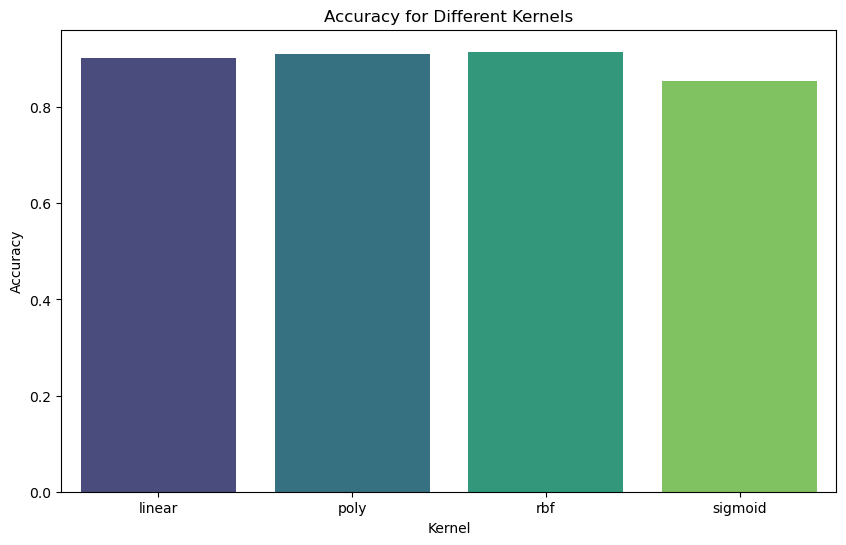

In [39]:
kernel_names, accuracies = zip(*results)
plt.figure(figsize=(10, 6))
sns.barplot(x=kernel_names, y=accuracies, palette='viridis')
plt.title("Accuracy for Different Kernels")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.show()

In [40]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

### Train the SVM Model with Grid Search

In [40]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}


grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1', verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.7s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.6s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.8s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.8s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.6s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   1.1s
[CV] END .....................C=0.1, gamma=0.01

### Keeping GridSearch Results

In [41]:
best_params = {
    'C': 10,
    'gamma': 0.01,
    'kernel': 'rbf'
}

SVM_best_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

SVM_best_model.fit(X_train, y_train)


SVC(C=10, gamma=0.01)

### Evaluate the Best Model

In [42]:
print("Best Parameters:", best_params)
y_pred_best = SVM_best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)

print("Optimized Model Performance on Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)

print("Best Model Results:")
print(classification_report(y_test, y_pred_best))

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Optimized Model Performance on Test Set:
Accuracy: 0.9159259259259259
Precision: 0.8132854578096947
Recall: 0.7864583333333334
F1-Score: 0.7996469549867609

Confusion Matrix:
 [[2020  104]
 [ 123  453]]
Best Model Results:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2124
           1       0.81      0.79      0.80       576

    accuracy                           0.92      2700
   macro avg       0.88      0.87      0.87      2700
weighted avg       0.92      0.92      0.92      2700



## Visualize the Confusion Matrix

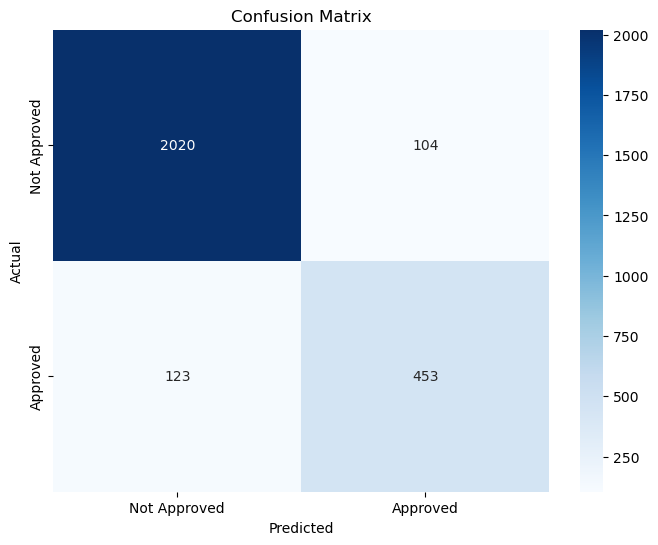

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Visualize Classification Metrics

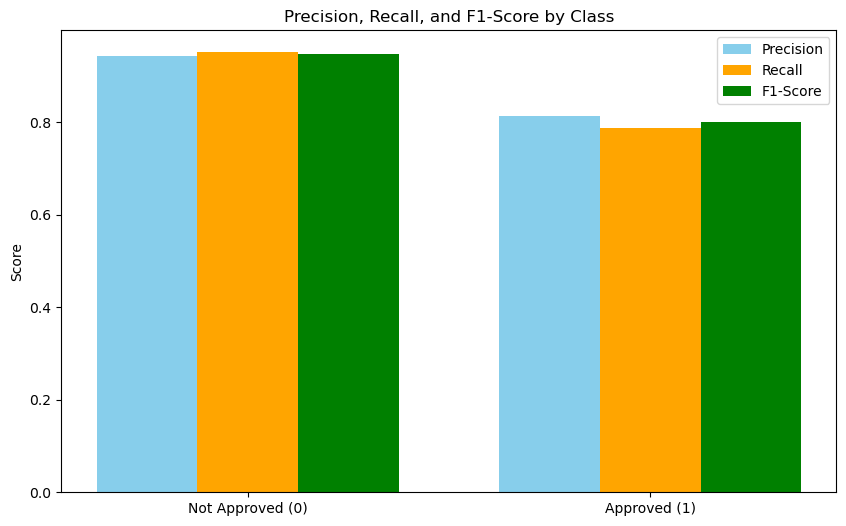

In [44]:
metrics = precision_recall_fscore_support(y_test, y_pred_best, average=None, labels=[0, 1])
precision, recall, f1_score = metrics[0], metrics[1], metrics[2]

categories = ['Not Approved (0)', 'Approved (1)']
x = range(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x, precision, width=0.25, label='Precision', color='skyblue', align='center')
plt.bar([p + 0.25 for p in x], recall, width=0.25, label='Recall', color='orange', align='center')
plt.bar([p + 0.50 for p in x], f1_score, width=0.25, label='F1-Score', color='green', align='center')
plt.xticks([p + 0.25 for p in x], categories)
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score by Class')
plt.legend()
plt.show()


## apply the model to testing set for prediction

In [45]:
new_data = {
    'person_age': [29],  
    'person_education': [1],  
    'person_income': [65000.0],  
    'person_emp_exp': [5],  
    'loan_amnt': [80000.0],  
    'loan_int_rate': [43.50], 
    'loan_percent_income': [1.1],  
    'cb_person_cred_hist_length': [00.3],  
    'credit_score': [700], 
    'previous_loan_defaults_on_file': [1],  
    'person_home_ownership_MORTGAGE': [False],  
    'person_home_ownership_OTHER': [False],
    'person_home_ownership_OWN': [True],  
    'person_home_ownership_RENT': [False],
    'loan_intent_DEBTCONSOLIDATION': [True],  
    'loan_intent_EDUCATION': [False],
    'loan_intent_HOMEIMPROVEMENT': [False],
    'loan_intent_MEDICAL': [True],
    'loan_intent_PERSONAL': [False],  
    'loan_intent_VENTURE': [True],
    'person_gender_female': [False], 
    'person_gender_male': [True]  
}



new_data= pd.DataFrame(new_data)
predicted_status = SVM_best_model.predict(new_data)
print("Predicted Loan Status:", predicted_status[0])

Predicted Loan Status: 1


c:\Users\Abdelrahman\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but SVC was fitted without feature names



# Support Vector Machine (SVM)

The Support Vector Machine (SVM) algorithm was used to classify loan approval statuses by finding the best separating boundary between classes.

### What SVM Does:
- SVM identifies a hyperplane in the feature space that best separates the classes.
- When data is not linearly separable, kernel functions are used to project the data into a higher-dimensional space where separation becomes possible.

### Insights from SVM in This Project:
- **Kernel Selection**: The RBF (Radial Basis Function) kernel performed best as it handled the non-linear relationships in the dataset effectively.
- **Parameter Tuning**: Optimizing parameters like `C` (controls margin width) and `gamma` (controls kernel shape) improved accuracy significantly.
- **Performance vs. Computation**: While SVM achieved high accuracy, it required more computation time compared to simpler models, especially during parameter optimization.


# KNN Algorithm

## split the data

In [46]:
X = data.drop(columns=['loan_status'])
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## implementation of KNN with different range of K and evaluate its performance by using evaluation mertics

In [49]:
from sklearn.metrics import f1_score

k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"\nK={k}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")


K=1:
Accuracy: 0.8687
Precision: 0.8675
Recall: 0.8687
F1-Score: 0.8681

K=2:
Accuracy: 0.8756
Precision: 0.8732
Recall: 0.8756
F1-Score: 0.8645

K=3:
Accuracy: 0.8859
Precision: 0.8823
Recall: 0.8859
F1-Score: 0.8833

K=4:
Accuracy: 0.8863
Precision: 0.8840
Recall: 0.8863
F1-Score: 0.8780

K=5:
Accuracy: 0.8924
Precision: 0.8887
Recall: 0.8924
F1-Score: 0.8889

K=6:
Accuracy: 0.8927
Precision: 0.8907
Recall: 0.8927
F1-Score: 0.8857

K=7:
Accuracy: 0.8956
Precision: 0.8921
Recall: 0.8956
F1-Score: 0.8916

K=8:
Accuracy: 0.8963
Precision: 0.8947
Recall: 0.8963
F1-Score: 0.8896

K=9:
Accuracy: 0.8997
Precision: 0.8966
Recall: 0.8997
F1-Score: 0.8956

K=10:
Accuracy: 0.8970
Precision: 0.8955
Recall: 0.8970
F1-Score: 0.8905

K=11:
Accuracy: 0.8979
Precision: 0.8948
Recall: 0.8979
F1-Score: 0.8933

K=12:
Accuracy: 0.8984
Precision: 0.8971
Recall: 0.8984
F1-Score: 0.8918

K=13:
Accuracy: 0.8993
Precision: 0.8967
Recall: 0.8993
F1-Score: 0.8944

K=14:
Accuracy: 0.8989
Precision: 0.8975
Recal

## experiment with different distance metrics and select the best K based on performance metrics 

In [50]:
best_k = None
best_metric = None
best_f1 = 0
KNN_best_model = None


metrics = ['euclidean', 'manhattan', 'minkowski']
for metric in metrics:
    print(f"\nEvaluating Metric: {metric}")
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f"K={k}: Accuracy={accuracy_score(y_test, y_pred):.4f}, "
              f"Precision={precision_score(y_test, y_pred, average='weighted'):.4f}, "
              f"Recall={recall_score(y_test, y_pred, average='weighted'):.4f}, "
              f"F1-Score={f1:.4f}")
        if f1 > best_f1:
            best_k = k
            best_metric = metric
            best_f1 = f1
            KNN_best_model = knn
print(f"\nBest k value: {best_k}")
print(f"Best Distance Metric: {best_metric}")
print(f"Best F1-Score: {best_f1:.4f}")




Evaluating Metric: euclidean
K=1: Accuracy=0.8687, Precision=0.8675, Recall=0.8687, F1-Score=0.8681
K=2: Accuracy=0.8756, Precision=0.8732, Recall=0.8756, F1-Score=0.8645
K=3: Accuracy=0.8859, Precision=0.8823, Recall=0.8859, F1-Score=0.8833
K=4: Accuracy=0.8863, Precision=0.8840, Recall=0.8863, F1-Score=0.8780
K=5: Accuracy=0.8924, Precision=0.8887, Recall=0.8924, F1-Score=0.8889
K=6: Accuracy=0.8927, Precision=0.8907, Recall=0.8927, F1-Score=0.8857
K=7: Accuracy=0.8956, Precision=0.8921, Recall=0.8956, F1-Score=0.8916
K=8: Accuracy=0.8963, Precision=0.8947, Recall=0.8963, F1-Score=0.8896
K=9: Accuracy=0.8997, Precision=0.8966, Recall=0.8997, F1-Score=0.8956
K=10: Accuracy=0.8970, Precision=0.8955, Recall=0.8970, F1-Score=0.8905
K=11: Accuracy=0.8979, Precision=0.8948, Recall=0.8979, F1-Score=0.8933
K=12: Accuracy=0.8984, Precision=0.8971, Recall=0.8984, F1-Score=0.8918
K=13: Accuracy=0.8993, Precision=0.8967, Recall=0.8993, F1-Score=0.8944
K=14: Accuracy=0.8989, Precision=0.8975, Re

## apply the model to testing set for prediction

In [51]:
new = {
    'person_age': [30],  
    'person_education': [1],  
    'person_income': [75000.0],  
    'person_emp_exp': [5],  
    'loan_amnt': [40000.0],  
    'loan_int_rate': [50.50], 
    'loan_percent_income': [1.2],  
    'cb_person_cred_hist_length': [00.2],  
    'credit_score': [650], 
    'previous_loan_defaults_on_file': [1],  
    'person_home_ownership_MORTGAGE': [True],  
    'person_home_ownership_OTHER': [False],
    'person_home_ownership_OWN': [False],  
    'person_home_ownership_RENT': [False],
    'loan_intent_DEBTCONSOLIDATION': [True],  
    'loan_intent_EDUCATION': [False],
    'loan_intent_HOMEIMPROVEMENT': [False],
    'loan_intent_MEDICAL': [False],
    'loan_intent_PERSONAL': [False],  
    'loan_intent_VENTURE': [False],
    'person_gender_female': [False], 
    'person_gender_male': [True]  
}



new= pd.DataFrame(new)
predicted_class = KNN_best_model.predict(new)
print(f"Predicted Loan Status: {predicted_class[0]}")


Predicted Loan Status: 0


## confusion matrix

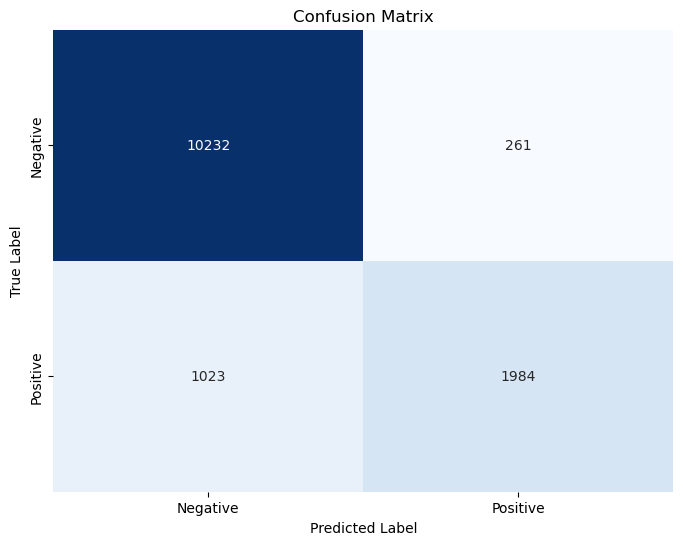

Confusion Matrix:
[[10232   261]
 [ 1023  1984]]


In [52]:
y_pred = KNN_best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Confusion Matrix:")
print(cm)

# K-Nearest Neighbors (KNN)

The K-Nearest Neighbors (KNN) algorithm was used to predict loan approval statuses based on similarities in the dataset.

### What KNN Does:
- KNN identifies the nearest data points (neighbors) to a new data point and assigns its class based on the majority class of the neighbors.
- It relies on a predefined number of neighbors, `K`, which determines how many points are considered.

### Insights from KNN in This Project:
- **Choosing 'K'**: Selecting an optimal value for `K` was critical. Too few neighbors caused the model to overreact to noise, while too many diluted the impact of the closest neighbors.
  
### Comparing Distance Metrics:
- **Euclidean Distance**:
  - Measures straight-line distance between points in the feature space.
  - Performed better in this project due to the balanced scaling of features.

- **Manhattan Distance**:
  - Calculates distance by summing absolute differences along each axis.
  - Was slightly less effective, indicating that the relationships in the dataset were better captured by Euclidean geometry.

### Scaling Features:
Standardizing the data was crucial since KNN is sensitive to feature magnitudes. Without scaling, some features could dominate distance calculations.


# Naive Bays Algoriyhm

In [53]:
X = data.drop(columns=['loan_status'])
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## train the model and evaluate its performance using evaluation evaluation metrics

In [54]:
nb_model= GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [55]:
y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy (No Regularization): {train_accuracy:.2f}")
print(f"Test Accuracy (No Regularization): {test_accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Training Accuracy (No Regularization): 0.75
Test Accuracy (No Regularization): 0.75
Confusion Matrix:
 [[4809 2181]
 [  50 1960]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.69      0.81      6990
           1       0.47      0.98      0.64      2010

    accuracy                           0.75      9000
   macro avg       0.73      0.83      0.72      9000
weighted avg       0.87      0.75      0.77      9000



## apply the model to testing set for prediction

In [56]:
new ={'person_age':[23],
      'person_education':[4],
      'person_income':[80000.0],
      'person_emp_exp':[1],
      'loan_amnt':[35000.0],
      'loan_int_rate':[16.02],
      'loan_percent_income':[0.49],
      'cb_person_cred_hist_length':[3.0],
      'credit_score':[561],
      'previous_loan_defaults_on_file':[1],
      'person_home_ownership_MORTGAGE':[False],
      'person_home_ownership_OTHER':[False],
      'person_home_ownership_OWN':[True],
      'person_home_ownership_RENT':[False],
      'loan_intent_DEBTCONSOLIDATION':[False],
      'loan_intent_EDUCATION':[False],
      'loan_intent_HOMEIMPROVEMENT':[False],
      'loan_intent_MEDICAL':[False],
      'loan_intent_PERSONAL':[True],
      'loan_intent_VENTURE':[False],
      'person_gender_female':[True],
      'person_gender_male':[False]
}
new = pd.DataFrame(new)

predicted_class = nb_model.predict(new) 

print(f"predicted new data is: {predicted_class[0]}")

predicted new data is: 0


# Naive Bayes

Naive Bayes was used to classify loan approval statuses using probability-based predictions.

### What Naive Bayes Does:
- The model calculates the likelihood of a class based on feature values, assuming that features contribute independently to the outcome.
- It is based on Bayes' theorem, which provides a probabilistic framework for classification.

### Insights from Naive Bayes in This Project:
- **Efficiency**: The model was very fast to train and test, making it suitable for quick predictions.
- **Performance**: While it achieved reasonable accuracy, its assumption of feature independence limited its ability to model feature relationships accurately.
- **Use Case**: Naive Bayes served as a strong baseline for comparison with more complex models.


# Decision Tree

In [57]:
data.columns

Index(['person_age', 'person_education', 'person_income', 'person_emp_exp',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'person_gender_female',
       'person_gender_male'],
      dtype='object')

In [58]:
X = data.drop(columns=['loan_status'])
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model = DecisionTreeClassifier(criterion= 'entropy',max_depth=3 ,random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [60]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8932222222222223


## Evaluate the Model Performance

In [61]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy (No Regularization): {train_accuracy:.2f}")
print(f"Test Accuracy (No Regularization): {test_accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Training Accuracy (No Regularization): 0.90
Test Accuracy (No Regularization): 0.89
Confusion Matrix:
 [[6755  235]
 [ 726 1284]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6990
           1       0.85      0.64      0.73      2010

    accuracy                           0.89      9000
   macro avg       0.87      0.80      0.83      9000
weighted avg       0.89      0.89      0.89      9000



## Use GridSearchCV for hyperparameter optimization

In [62]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)



Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


## Train the best model and visualize the tree

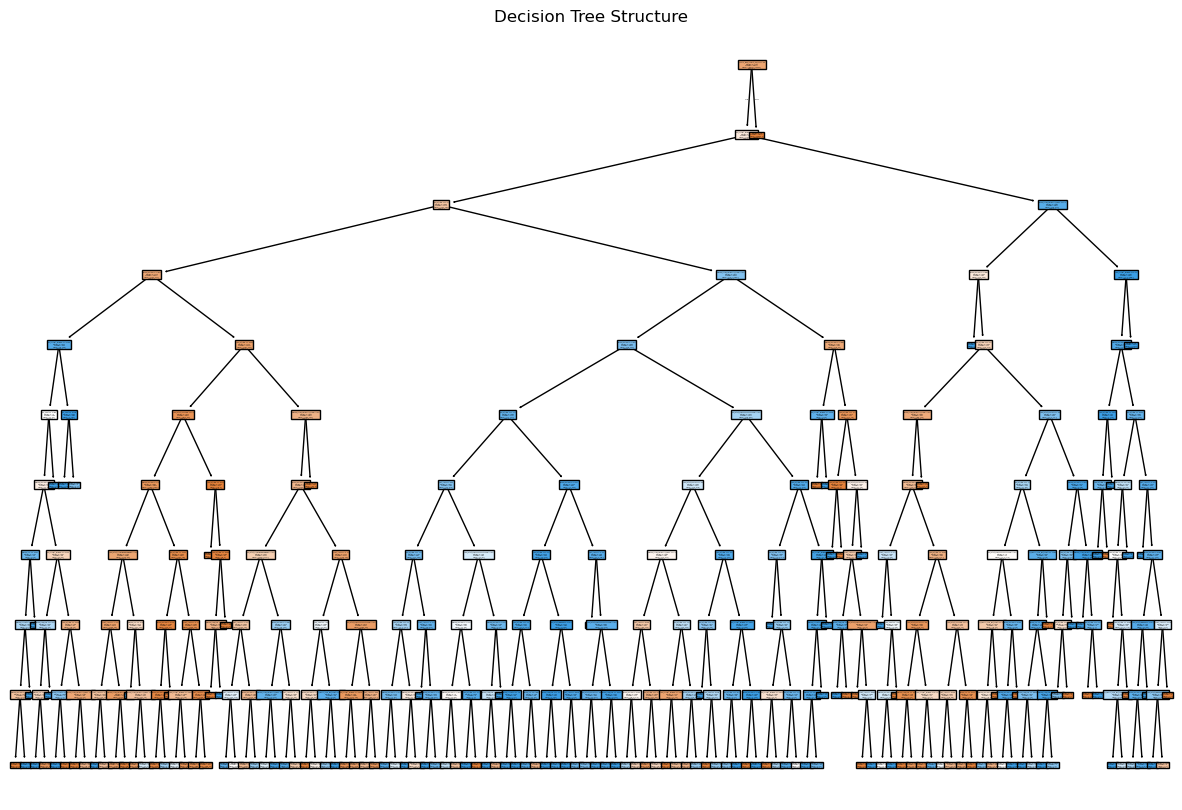

In [63]:

DT_best_model = grid_search.best_estimator_
plt.figure(figsize=(15, 10))
plot_tree(
    DT_best_model,
    feature_names=X.columns, 
    class_names=[str(cls) for cls in np.unique(y)],  
    filled=True
)
plt.title("Decision Tree Structure")
plt.show()

# Decision Tree

A Decision Tree classifier was used to predict loan approval statuses by learning decision rules from the features.

### What Decision Tree Does:
- The model splits the data into subsets based on feature values, forming a tree structure where each branch represents a decision.
- It continues splitting until a stopping condition is reached or all data points are classified.

### Insights from Decision Tree in This Project:
- **Explainability**: The tree structure provided insights into which features were most important in determining loan approvals.
- **Overfitting Risk**: Without constraints, the tree overfit the training data, reducing its performance on new data. Adjusting parameters like `max_depth` and `min_samples_split` helped mitigate this issue.
- **Visualization**: The decision tree visualization was helpful for understanding the model’s behavior and identifying key features.


## Evaluate the Best Decision Tree Model

In [64]:
y_best_train = DT_best_model.predict(X_train)
y_best_test = DT_best_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_best_train)
test_accuracy = accuracy_score(y_test, y_best_test)

print(f"Training Accuracy (No Regularization): {train_accuracy:.2f}")
print(f"Test Accuracy (No Regularization): {test_accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_best_test)
class_report = classification_report(y_test, y_best_test)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Training Accuracy (No Regularization): 0.93
Test Accuracy (No Regularization): 0.92
Confusion Matrix:
 [[6799  191]
 [ 535 1475]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.89      0.73      0.80      2010

    accuracy                           0.92      9000
   macro avg       0.91      0.85      0.88      9000
weighted avg       0.92      0.92      0.92      9000



# Comparison and Summary

The performance of the four algorithms was evaluated and compared:

### Model Performance:
- **SVM**: Delivered the highest accuracy, especially with the RBF kernel, but required significant computational resources.
- **KNN**: Performed well with optimal `K` and Euclidean distance but was sensitive to scaling and computationally expensive for large datasets.
- **Naive Bayes**: Quick and efficient but limited by its assumption of feature independence.
- **Decision Tree**: Provided valuable insights into feature importance but needed fine-tuning to avoid overfitting.

### Key Takeaways:
- **Data Preprocessing**: Scaling features was essential for KNN and SVM to function correctly.
- **Parameter Optimization**: Both SVM and Decision Tree benefited greatly from hyperparameter tuning, highlighting its importance in achieving optimal performance.
- **Model Selection**: SVM offered the best accuracy, while Decision Tree excelled in providing clear insights into the decision-making process.

By comparing these models, it was clear that each has its strengths and trade-offs, making the choice of model dependent on the specific needs of the problem.
